# Breast Cancer Analysis - Final Project



In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
from scipy.optimize import minimize
import sklearn.linear_model as lm
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (4, 4)
plt.rcParams['figure.dpi'] = 150
plt.rcParams['lines.linewidth'] = 3
sns.set()

## Breast Cancer Analysis

In [4]:
df = pd.read_csv("data.csv")

In [5]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [6]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

Create diagnosis column in 1's meaning malignant

In [8]:
# drop null column
df = df.drop(columns=['Unnamed: 32'])

# diagnosis column
df['diagnosis'] = np.where(df['diagnosis'] == 'M', 1, 0)
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678



## Feature Selection

Using a forest, figure out feature importance to reduce dimensionality of latter analysis.



In [10]:
# split into features and target
X = df.drop(columns=['diagnosis', 'id'])
Y = df['diagnosis']

In [11]:
# split data to training and test data
from sklearn.model_selection import train_test_split

# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state=109) #70% training

In [12]:
from sklearn.ensemble import RandomForestClassifier

# Train random forest and get feature importances
model = RandomForestClassifier()
model.fit(X_train, y_train)
importances = model.feature_importances_


In [13]:
# Display feature importances
feature_importances = pd.DataFrame({
    'feature' : X_train.columns,
    'importance' : importances
}).sort_values(by = 'importance', ascending = False)

feature_importances

,feature,importance
7,concave points_mean,0.126181
27,concave points_worst,0.120884
23,area_worst,0.118601
22,perimeter_worst,0.110464
20,radius_worst,0.093173
13,area_se,0.058772
6,concavity_mean,0.057394
26,concavity_worst,0.047303
2,perimeter_mean,0.033266
3,area_mean,0.027698


<Axes: xlabel='feature'>

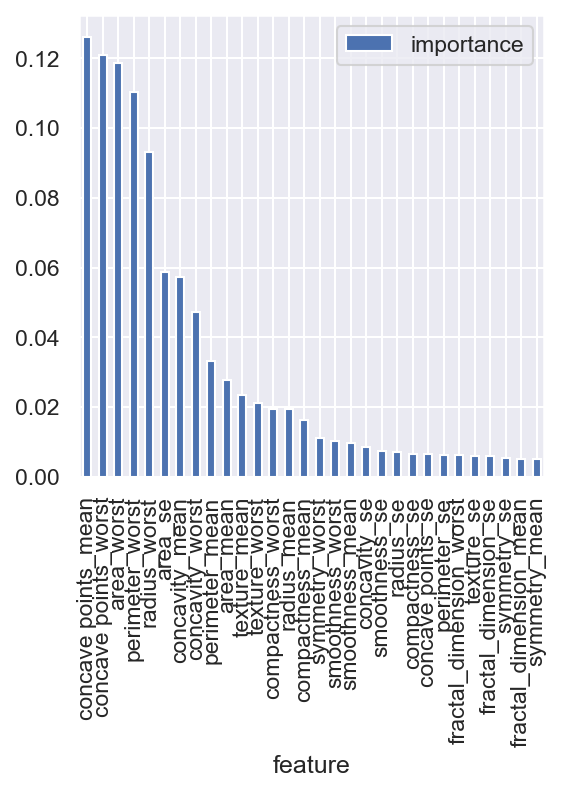

In [14]:
# Display histogram
feature_importances.set_index('feature').plot(kind = 'bar')

## Correlation Matrix
Creating a correlation matrix for features with an importance >= 0.01

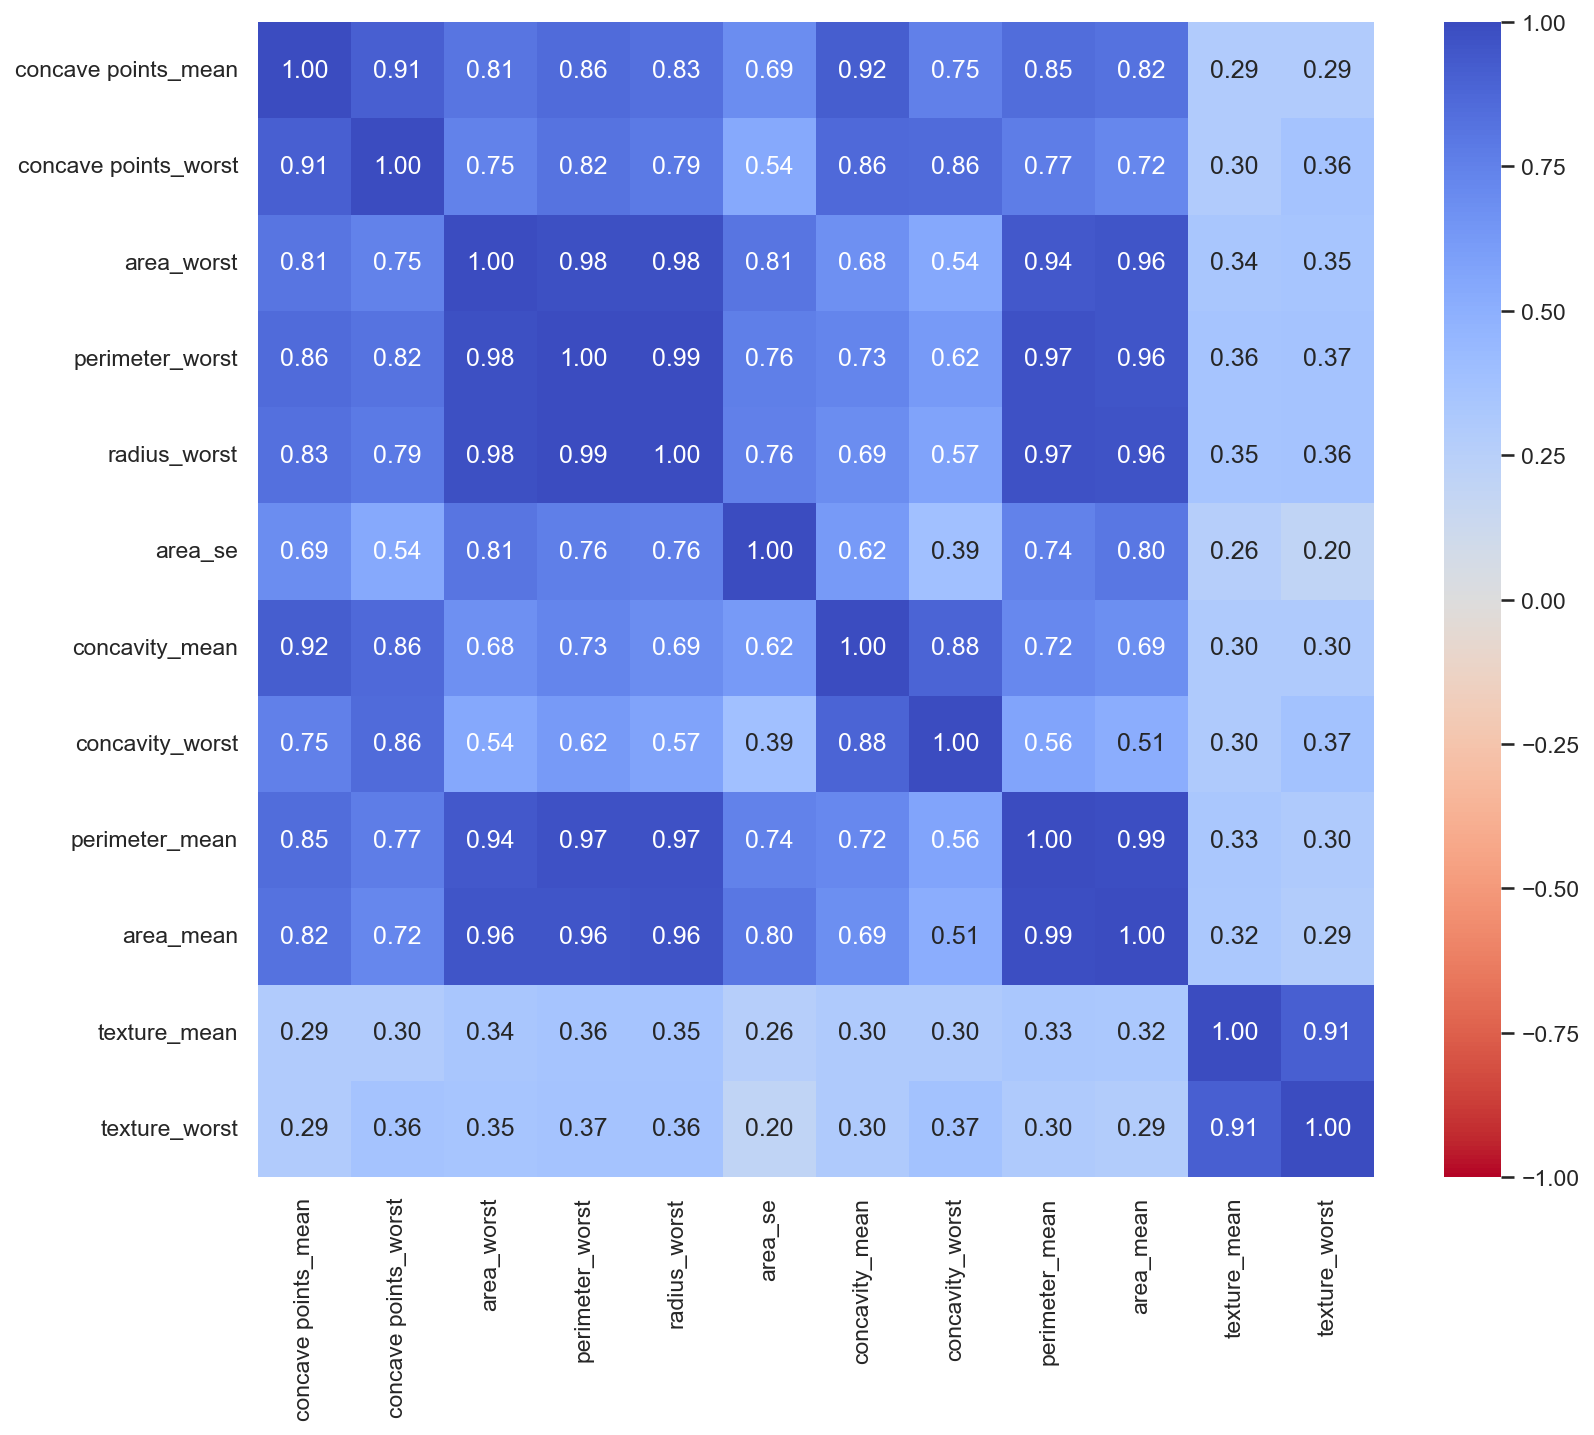

In [16]:
# Get features with importance >= 0.01
important_features = feature_importances.query('importance >= 0.02')['feature']

# Get subset of DataFrame
important_df = df[list(important_features)]

# Start by creating the correlation matrix:
df_corr = important_df.corr(numeric_only = True)

# Using heatmap to create a correlation plot
plt.figure(figsize=(12, 10))
sns.heatmap(
    data = df_corr,
    annot = True, # Show the correlation values,
    fmt = '.2f', # Round to 2 decimal places
    cmap = 'coolwarm_r', # reverses the coolwarm color palette
    vmin = -1,
    vmax = +1
);

In [17]:
# Find pairs of features with high correlations
significant_correlations = []
for x in list(df_corr.index):
    for y in list(df_corr.columns):
        if not (x == y) and df_corr[y][x] >= 0.8:
            pair = [x, y]
            if set(pair) not in [set(i) for i in significant_correlations]:
                significant_correlations.append(pair)
significant_correlations

[['concave points_mean', 'concave points_worst'],
 ['concave points_mean', 'area_worst'],
 ['concave points_mean', 'perimeter_worst'],
 ['concave points_mean', 'radius_worst'],
 ['concave points_mean', 'concavity_mean'],
 ['concave points_mean', 'perimeter_mean'],
 ['concave points_mean', 'area_mean'],
 ['concave points_worst', 'perimeter_worst'],
 ['concave points_worst', 'concavity_mean'],
 ['concave points_worst', 'concavity_worst'],
 ['area_worst', 'perimeter_worst'],
 ['area_worst', 'radius_worst'],
 ['area_worst', 'area_se'],
 ['area_worst', 'perimeter_mean'],
 ['area_worst', 'area_mean'],
 ['perimeter_worst', 'radius_worst'],
 ['perimeter_worst', 'perimeter_mean'],
 ['perimeter_worst', 'area_mean'],
 ['radius_worst', 'perimeter_mean'],
 ['radius_worst', 'area_mean'],
 ['area_se', 'area_mean'],
 ['concavity_mean', 'concavity_worst'],
 ['perimeter_mean', 'area_mean'],
 ['texture_mean', 'texture_worst']]


## SVM Model

Split between malignant and benign
reference - https://www.datacamp.com/tutorial/svm-classification-scikit-learn-python
initially split dat into train and test


In [19]:
# split into features and target
X = df.drop(columns=['diagnosis', 'id'])
Y = df['diagnosis']
print(X)

     radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     compactness_mean  concavity_mean  concave points_mean  sym

In [20]:
# split data to training and test data
from sklearn.model_selection import train_test_split

# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state=109) #70% training
print(X_train.dtypes)  # Check data types
print(X_train.isnull().sum())  

radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst       float64
symmetry_worst      

Geneate model

In [22]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

y_pred

array([0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0])

Evaluate model

In [24]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))


Accuracy: 0.9649122807017544
Precision: 0.9384615384615385
Recall: 0.9682539682539683


## KNN
k-nearest neighbors with scikit-learn.
For this model we will be using some of the top correlated features to if it is malignant or benign. In this case thoase will be perimeter_worst and concave points_worst.
https://www.datacamp.com/tutorial/k-nearest-neighbor-classification-scikit-learn
https://www.statology.org/pandas-loc-multiple-columns/


In [26]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Scatterplot to view the features with if it's cancerous or not

<Axes: xlabel='concave points_worst', ylabel='perimeter_worst'>

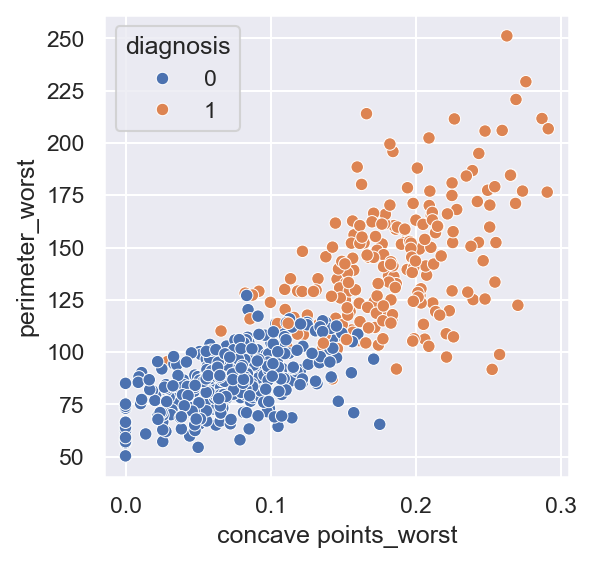

In [28]:
sns.scatterplot(x=df['concave points_worst'], y=df['perimeter_worst'], hue=df['diagnosis'])

Need to normalize and split the data. KNN measures the distance between points. The default is Euclidean Distance. Because of large number difference in perimieter and concave points, it needs to be normalized. 

In [30]:
from sklearn.preprocessing import StandardScaler

X = df.loc[:, ['concave points_worst', 'perimeter_worst']]
Y = df['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

# Scale features with StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [31]:
# Fit and evaluate a model, let k be 3 for this

In [32]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [33]:
from sklearn.metrics import accuracy_score

y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.956140350877193


In [34]:
# FINDING THE BEST K VALUE

In [35]:
from sklearn.model_selection import cross_val_score

k_values = [i for i in range (1,200)]
scores = []

scaler = StandardScaler()
X = scaler.fit_transform(X)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X, Y, cv=5)
    scores.append(np.mean(score))

In [36]:
# PLOT THE RESULTS

Text(0, 0.5, 'Accuracy Score')

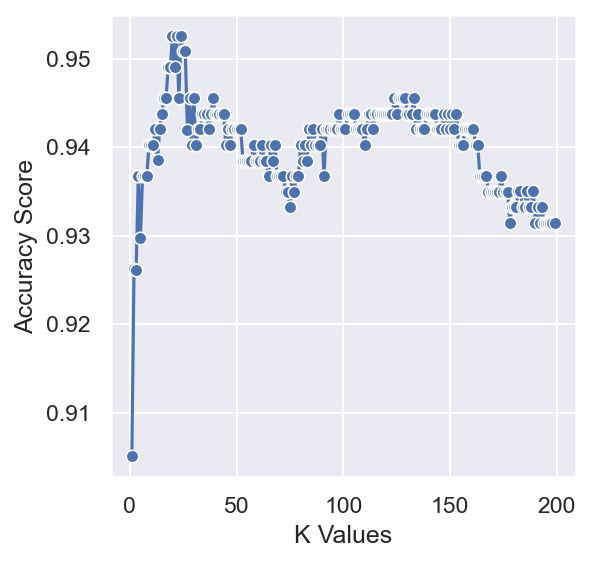

In [37]:
sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")

In [38]:
# CHOOSE THE BEST K VALUE

In [39]:
best_index = np.argmax(scores)
best_k = k_values[best_index]

knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=24)

In [40]:
# EVALUATE ACCURACY, PERCISION, AND RECALL

In [41]:
from sklearn.metrics import precision_score, recall_score

y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.956140350877193
Precision: 1.0
Recall: 0.8936170212765957


In [42]:
# Plot decision boundry
!pip install mlxtend


   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
    --------------------------------------- 0.0/1.4 MB 320.0 kB/s eta 0:00:05
   ---- ----------------------------------- 0.1/1.4 MB 1.4 MB/s eta 0:00:01
   ------------------ --------------------- 0.6/1.4 MB 5.0 MB/s eta 0:00:01
   ------------------------------------- -- 1.3/1.4 MB 7.3 MB/s eta 0:00:01
   ---------------------------------------- 1.4/1.4 MB 6.6 MB/s eta 0:00:00


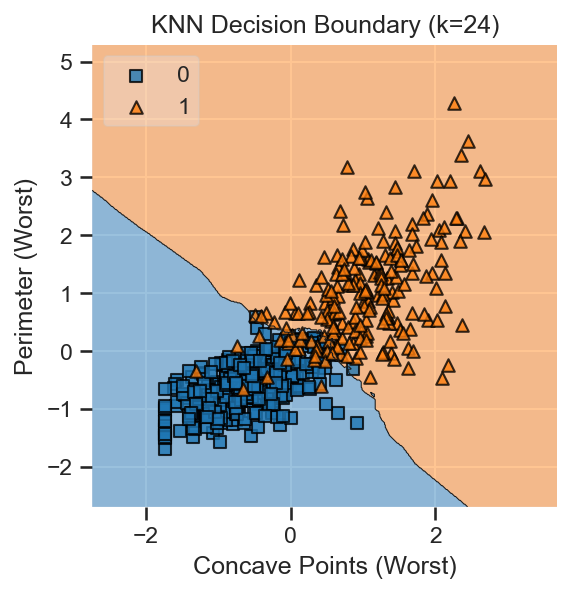

In [43]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
from mlxtend.plotting import plot_decision_regions


# Recombine scaled full feature set for X and Y
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X, Y)

# Plot decision boundary
plot_decision_regions(X, Y.to_numpy(), clf=knn, legend=2)

plt.xlabel('Concave Points (Worst)')
plt.ylabel('Perimeter (Worst)')
plt.title(f'KNN Decision Boundary (k={best_k})')
plt.show()


## Visulization
using features found in correlation matrix


In [ ]:
cancer_data['diagnosis'].value_counts()

In [ ]:
# Make scatterplot
sns.scatterplot(data = cancer_data, x = 'concave points_mean', y = 'perimeter_mean', hue = 'diagnosis');

## Classification Tree



Split data into training and testing sets

In [ ]:
X_train, X_test, y_train, y_test = (
    train_test_split(
        cancer_data.drop(columns = ['diagnosis'], axis = 1), 
        cancer_data['diagnosis'],
        test_size = 0.20, 
        random_state = 3870)
)

X_train

In [ ]:
X_test

Training vs testing y data

In [ ]:
y_train.value_counts(), y_test.value_counts()

Fit tree to data and plot

In [ ]:
# Fitting the tree to the data
cancer_tree = (
    tree.DecisionTreeClassifier(criterion = 'gini', random_state = 3870)
    .fit(X_train[['concave points_mean', 'perimeter_mean']],y_train)
)

In [ ]:
# Plotting the tree
plt.figure(figsize = [12, 6])
tree.plot_tree(
    cancer_tree, # Model
    feature_names = ['concave points_mean', 'perimeter_mean'],
    class_names = np.unique(y_train),
    filled = True,
    rounded = True
)
plt.show()

Draw decision boundary for decision tree classifier and see how testing and training data perform

In [7]:
sns_cmap = ListedColormap(np.array(sns.color_palette())[0:2, :]).reversed()

xx, yy = np.meshgrid(np.arange(0, 0.3, 0.02), np.arange(0, 200, 0.02))
Z_string = cancer_tree.predict(pd.DataFrame(np.c_[xx.ravel(), yy.ravel()], columns = ['concave points_mean', 'perimeter_mean']))
categories, Z_int = np.unique(Z_string, return_inverse = True)
Z_int = Z_int.reshape(xx.shape)
plt.contourf(xx, yy, Z_int, cmap = sns_cmap)
sns.scatterplot(data = X_train, x = 'concave points_mean', y = 'perimeter_mean', hue = y_train)
plt.title('Decision Tree on Training Data');

NameError: name 'ListedColormap' is not defined

In [9]:
sns_cmap = ListedColormap(np.array(sns.color_palette())[0:2, :]).reversed()

xx, yy = np.meshgrid(np.arange(0, 0.3, 0.02), np.arange(0, 200, 0.02))
Z_string = cancer_tree.predict(pd.DataFrame(np.c_[xx.ravel(), yy.ravel()], columns = ['concave points_mean', 'perimeter_mean']))
categories, Z_int = np.unique(Z_string, return_inverse = True)
Z_int = Z_int.reshape(xx.shape)
plt.contourf(xx, yy, Z_int, cmap = sns_cmap)
sns.scatterplot(data = X_test, x = 'concave points_mean', y = 'perimeter_mean', hue = y_test)
plt.title('Decision Tree on Testing Data');

NameError: name 'ListedColormap' is not defined

In [11]:
ct_training_accuracy = cancer_tree.score(X_train[['concave points_mean', 'perimeter_mean']], y_train)
ct_test_accuracy = cancer_tree.score(X_test[['concave points_mean', 'perimeter_mean']], y_test)
round(ct_training_accuracy, 3), round(ct_test_accuracy, 3)

NameError: name 'cancer_tree' is not defined

The tree may be overfitted to the training data!

### Pruning
Get ccp alpha values from tree

In [ ]:
cancer_ccp_alphas = (
    cancer_tree       # model
    .cost_complexity_pruning_path(X_train[['concave points_mean', 'perimeter_mean']], 
                                  y_train) # Finding the results for each split point
    .ccp_alphas # Getting just the ccp_alphas
)

cancer_ccp_alphas

Create trees for each choice of aplha and plot results

In [ ]:
# List to store the models
trees = []

# Looping through the different choices of ccp_alpha to create each tree
for alpha in cancer_ccp_alphas:
    # Starting the tree engine
    tree_loop = tree.DecisionTreeClassifier(random_state = 3870, criterion='gini', ccp_alpha=alpha)
    # Fitting the engine to the model
    tree_loop.fit(X_train[['concave points_mean', 'perimeter_mean']], y_train)
    # Adding the fitted model to the tree list
    trees.append(tree_loop)

In [ ]:
# Plotting the alpha value vs number of nodes
px.line(
    # Creating a data frame with num of nodes and the alpha value
    pd.DataFrame({
        'nodes': [tree.tree_.node_count for tree in trees],
        'alpha': cancer_ccp_alphas
    }),
    x = 'alpha',
    y = 'nodes',
    height = 600
).show();

Calculate accuracy for test data for each tree and make a plot of accuracy vs alpha value

In [ ]:
# Data set for the different choices of alpha, training accuracy, and testing accuracy
pruning_df = pd.DataFrame({
    'alpha': cancer_ccp_alphas,  # Different choices of alpha
    'train': [tree.score(X_train[['concave points_mean', 'perimeter_mean']], y_train) for tree in trees], # Shortcut of the accuracy for training
    'test':  [tree.score(X_test[['concave points_mean', 'perimeter_mean']], y_test)   for tree in trees]  # Shortcut of the accuracy for testing
}).melt(id_vars = 'alpha', value_name = 'accuracy', var_name = 'set') # Stacking the train and test accuracy columns together


# Line graph to show how the accuracy changes
sns.lineplot(
    data = pruning_df,
    x = 'alpha',
    y = 'accuracy',
    hue = 'set'
)
plt.ylabel('accuracy');

Find alpha value with highest accuracy

In [ ]:
best_alpha = (
  pruning_df
 .query('set == "test"') # Just looking at the accuracy of the test set
 .nlargest(columns = 'accuracy', n = 1) # Picking the row with the highest accuracy
)

best_alpha

Re-fit tree with best alpha value and plot

In [ ]:
cancer_tree_pruned = (
    tree.DecisionTreeClassifier(
        criterion = 'gini', 
        ccp_alpha = best_alpha['alpha'].sum(),  # sum converts it from a series to a float
        random_state = 3870
    )
    .fit(X = X_train[['concave points_mean', 'perimeter_mean']], y = y_train)
)

In [ ]:
plt.figure(figsize = [12, 6])
tree.plot_tree(
    cancer_tree_pruned, # Model
    feature_names = ['concave points_mean', 'perimeter_mean'],
    class_names = np.unique(y_train),
    filled = True,
    rounded = True
)
plt.show()

Draw decision boundary for pruned tree

In [ ]:
sns_cmap = ListedColormap(np.array(sns.color_palette())[0:2, :]).reversed()

xx, yy = np.meshgrid(np.arange(0, 0.3, 0.02), np.arange(0, 200, 0.02))
Z_string = cancer_tree_pruned.predict(pd.DataFrame(np.c_[xx.ravel(), yy.ravel()], columns = ['concave points_mean', 'perimeter_mean']))
categories, Z_int = np.unique(Z_string, return_inverse = True)
Z_int = Z_int.reshape(xx.shape)
plt.contourf(xx, yy, Z_int, cmap = sns_cmap)
sns.scatterplot(data = X_train, x = 'concave points_mean', y = 'perimeter_mean', hue = y_train)
plt.title('Decision Tree on Training Data');

In [ ]:
sns_cmap = ListedColormap(np.array(sns.color_palette())[0:2, :]).reversed()

xx, yy = np.meshgrid(np.arange(0, 0.3, 0.02), np.arange(0, 200, 0.01))
Z_string = cancer_tree_pruned.predict(pd.DataFrame(np.c_[xx.ravel(), yy.ravel()], columns = ['concave points_mean', 'perimeter_mean']))
categories, Z_int = np.unique(Z_string, return_inverse = True)
Z_int = Z_int.reshape(xx.shape)
plt.contourf(xx, yy, Z_int, cmap = sns_cmap)
sns.scatterplot(data = X_test, x = 'concave points_mean', y = 'perimeter_mean', hue = y_test)
plt.title('Decision Tree on Testing Data');

Check accuracy of pruned tree

In [ ]:
ct_training_accuracy = cancer_tree_pruned.score(X_train[['concave points_mean', 'perimeter_mean']], y_train)
ct_test_accuracy = cancer_tree_pruned.score(X_test[['concave points_mean', 'perimeter_mean']], y_test)
round(ct_training_accuracy, 3), round(ct_test_accuracy, 3)

The tree is now more accurate for testing data than training data

### Draw Decision boundary with full feature set

In [ ]:
sns_cmap = ListedColormap(np.array(sns.color_palette())[0:2, :]).reversed()

xx, yy = np.meshgrid(np.arange(0, 0.3, 0.02), np.arange(0, 200, 0.01))
Z_string = cancer_tree_pruned.predict(pd.DataFrame(np.c_[xx.ravel(), yy.ravel()], columns = ['concave points_mean', 'perimeter_mean']))
categories, Z_int = np.unique(Z_string, return_inverse = True)
Z_int = Z_int.reshape(xx.shape)
plt.contourf(xx, yy, Z_int, cmap = sns_cmap)
sns.scatterplot(data = cancer_data, x = 'concave points_mean', y = 'perimeter_mean', hue = 'diagnosis')
plt.title('Decision Tree on Testing Data');

In [ ]:
ct_accuracy = cancer_tree_pruned.score(cancer_data[['concave points_mean', 'perimeter_mean']], cancer_data['diagnosis'])
round(ct_accuracy, 3)